In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import (
    make_blobs, # is used to generate isotropic Gaussian blobs for clustering
    load_breast_cancer, # is used to load and return the breast cancer wisconsin dataset
)
from sklearn.preprocessing import StandardScaler # is used to standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import random

# Logistic Regression

로지스틱 회귀(Logistic Regression)는 분류 문제에 사용되는 통계적인 기법.
이 알고리즘은 주어진 입력 데이터를 기반으로 두 개 이상의 클래스 중 하나에 속할 확률을 예측하는 데 사용.
로지스틱 회귀는 선형 회귀와는 달리 출력값을 0과 1 사이의 확률로 제한하여 이진 분류 문제에 적합합.

로지스틱 회귀는 로지스틱 함수 또는 시그모이드 함수라고도 불리는 S자 모양의 곡선을 사용하여 입력 데이터와 출력값 사이의 관계를 모델링.
이 함수는 입력값을 받아 0과 1 사이의 값을 출력.
이를 통해 로지스틱 회귀는 입력 데이터를 시그모이드 함수를 통해 확률로 변환.

로지스틱 회귀의 예시 코드:
```python
from sklearn.linear_model import LogisticRegression

# 입력 데이터와 레이블 준비
X = [[1, 2], [3, 4], [5, 6]]
y = [0, 1, 0]

# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# 모델 훈련
model.fit(X, y)

# 새로운 데이터에 대한 예측
new_data = [[7, 8], [9, 10]]
predictions = model.predict(new_data)

print(predictions)
```
이 코드에서는 scikit-learn 라이브러리의 LogisticRegression 클래스를 사용하여 로지스틱 회귀 모델을 생성하고 훈련.

## Logistic Regression with Torch

In [2]:
# make_blobs는 등방성 가우시안 정규분포를 사용하여 가상 데이터를 생성.
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

In [5]:
model = LogisticRegression(input_size=2)

In [6]:
# define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
# train the model
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.unsqueeze(1).float())
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            predicted = model(X_train)
            predicted_cls = predicted.round()
            acc = accuracy_score(y_train, predicted_cls)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc:.4f}')

Epoch [10/100], Loss: 0.1690, Accuracy: 0.9900
Epoch [20/100], Loss: 0.1347, Accuracy: 0.9938
Epoch [30/100], Loss: 0.1124, Accuracy: 0.9962
Epoch [40/100], Loss: 0.0969, Accuracy: 0.9975
Epoch [50/100], Loss: 0.0855, Accuracy: 0.9975
Epoch [60/100], Loss: 0.0767, Accuracy: 1.0000
Epoch [70/100], Loss: 0.0698, Accuracy: 1.0000
Epoch [80/100], Loss: 0.0641, Accuracy: 1.0000
Epoch [90/100], Loss: 0.0594, Accuracy: 1.0000
Epoch [100/100], Loss: 0.0554, Accuracy: 1.0000


In [8]:
# predict the test set
with torch.no_grad():
    predicted = model(X_test)
    predicted_cls = predicted.round()
    acc = accuracy_score(y_test, predicted_cls)
    print(f'Test Accuracy: {acc:.4f}')

Test Accuracy: 1.0000


## Binary Classification Practice

In [9]:
def rand_seed(seed: int):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [10]:
rand_seed(42)

In [11]:
data = load_breast_cancer()
X = data.data
y = data.target

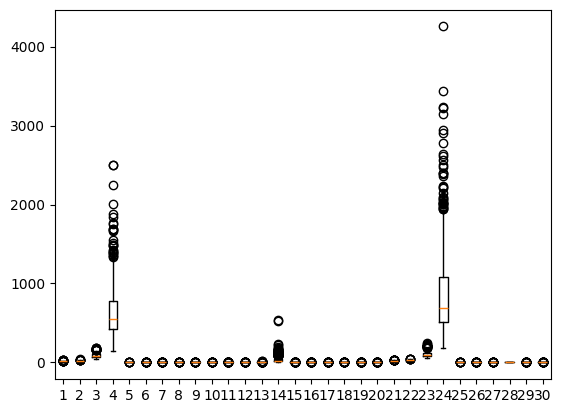

In [12]:
# box plot X
import matplotlib.pyplot as plt
plt.boxplot(X)
plt.show()

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

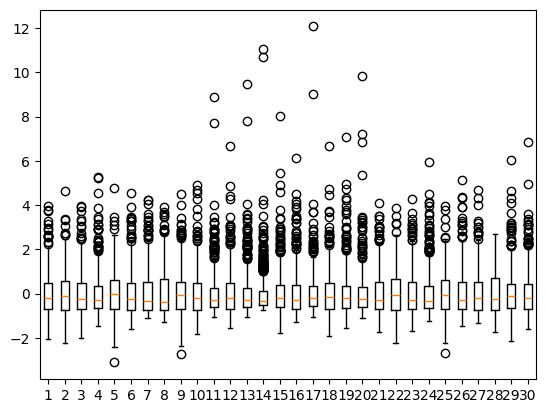

In [14]:
# box plot X
import matplotlib.pyplot as plt
plt.boxplot(X)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [17]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.rogistic = nn.Sequential(
            # ----------------- Fill your answer -----------------
            # ----------------- Fill your answer -----------------
        )
        
    def forward(self, x):
        # ----------------- Fill your answer -----------------
        out = 
        # ----------------- Fill your answer -----------------
        return out

In [18]:
model = LogisticRegression(input_size=30)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.unsqueeze(1).float())
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            predicted = model(X_train)
            predicted_cls = predicted.round()
            acc = accuracy_score(y_train, predicted_cls)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc:.4f}')

Epoch [10/100], Loss: 0.6438, Accuracy: 0.6813
Epoch [20/100], Loss: 0.5139, Accuracy: 0.8286
Epoch [30/100], Loss: 0.4357, Accuracy: 0.8769
Epoch [40/100], Loss: 0.3848, Accuracy: 0.9055
Epoch [50/100], Loss: 0.3489, Accuracy: 0.9187
Epoch [60/100], Loss: 0.3219, Accuracy: 0.9231
Epoch [70/100], Loss: 0.3007, Accuracy: 0.9275
Epoch [80/100], Loss: 0.2835, Accuracy: 0.9319
Epoch [90/100], Loss: 0.2691, Accuracy: 0.9319
Epoch [100/100], Loss: 0.2570, Accuracy: 0.9341


In [20]:
with torch.no_grad():
    predicted = model(X_test)
    predicted_cls = predicted.round()
    acc = accuracy_score(y_test, predicted_cls)
    print(f'Test Accuracy: {acc:.4f}')

Test Accuracy: 0.9561


# Softmax Regression
소프트맥스 회귀는 다중 클래스 분류 문제에 사용되는 알고리즘.
이 알고리즘은 입력 데이터를 각 클래스에 대한 확률로 변환하여 예측을 수행합니다.

소프트맥스 회귀의 핵심 아이디어는 입력 데이터에 대한 가중치와 편향을 사용하여 각 클래스에 대한 점수를 계산하는 것.
이 점수는 소프트맥스 함수를 통해 확률로 변환.

소프트맥스 함수는 입력된 점수를 정규화하여 각 클래스에 대한 확률을 계산.
이 함수는 지수 함수를 사용하여 점수를 양수로 만들고, 모든 클래스의 점수의 합으로 나누어 확률로 변환.

소프트맥스 회귀의 간단한 예제. 3개의 클래스(고양이, 개, 말)를 분류하는 문제를 가정.

이 예제에서는 입력 데이터 X와 가중치 W, 편향 b를 사용하여 각 클래스에 대한 점수를 계산.
그런 다음 소프트맥스 함수를 사용하여 점수를 확률로 변환.

In [22]:
import numpy as np

# 입력 데이터
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# 가중치와 편향
W = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9]])
b = np.array([0.1, 0.2, 0.3])

# 점수 계산
scores = np.dot(X, W) + b

# 소프트맥스 함수를 통한 확률 계산
exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

print(probs)

[[0.14146367 0.28487285 0.57366348]
 [0.03280241 0.16247141 0.80472617]
 [0.00618829 0.07538875 0.91842297]]


In [23]:
batch_size=100
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
learning_rate = 1e-1
epochs = 15

In [24]:
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [25]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim, bias=True)

    def forward(self, x):
        out = self.linear(x)
        return out

In [26]:
def train(model, optimizer, train_loader, criterion, device):
    model.train()
    avg_cost=0
    for batch_idx, (data, target) in enumerate(train_loader):
        # ----------------- Fill your answer -----------------
        # ----------------- Fill your answer -----------------
        avg_cost += loss / len(data)
    print('Epoch:', '%04d' % (epoch), 'cost =', '{:.9f}'.format(avg_cost))

In [27]:

def evaluate(model, test_loader, device):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.view(-1, 28 * 28).to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(test_loader.dataset)
    return accuracy

In [28]:
def predict(model, mnist_test, device):
    
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [29]:
model = SoftmaxRegression(28*28, 10).to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, epochs + 1):
    train(model, optimizer, train_loader, criterion, device)
    test_accuracy = evaluate(model, test_loader, device)
    print('Epoch [{}/{}], Test Accuracy: {:.2f}%'.format(epoch, epochs, test_accuracy))

Epoch: 0001 cost = 3.204918861
Epoch [1/15], Test Accuracy: 90.41%
Epoch: 0002 cost = 2.154778481
Epoch [2/15], Test Accuracy: 91.19%
Epoch: 0003 cost = 1.986838102
Epoch [3/15], Test Accuracy: 91.62%
Epoch: 0004 cost = 1.898522377
Epoch [4/15], Test Accuracy: 91.70%
Epoch: 0005 cost = 1.841276765
Epoch [5/15], Test Accuracy: 91.72%
Epoch: 0006 cost = 1.801764250
Epoch [6/15], Test Accuracy: 91.99%
Epoch: 0007 cost = 1.769300580
Epoch [7/15], Test Accuracy: 92.02%
Epoch: 0008 cost = 1.745447397
Epoch [8/15], Test Accuracy: 92.10%
Epoch: 0009 cost = 1.723941088
Epoch [9/15], Test Accuracy: 92.15%
Epoch: 0010 cost = 1.706655622
Epoch [10/15], Test Accuracy: 92.30%
Epoch: 0011 cost = 1.692227721
Epoch [11/15], Test Accuracy: 92.31%
Epoch: 0012 cost = 1.676990509
Epoch [12/15], Test Accuracy: 92.21%
Epoch: 0013 cost = 1.667406678
Epoch [13/15], Test Accuracy: 92.27%
Epoch: 0014 cost = 1.655733943
Epoch [14/15], Test Accuracy: 92.23%
Epoch: 0015 cost = 1.646138906
Epoch [15/15], Test Accura

Label:  1
Prediction:  1


/opt/homebrew/anaconda3/envs/ossp1-2401/lib/python3.11/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/opt/homebrew/anaconda3/envs/ossp1-2401/lib/python3.11/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


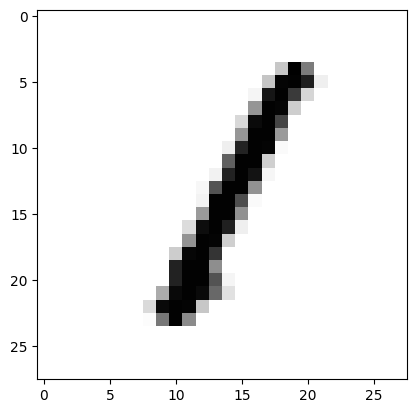

In [30]:
predict(model, test_dataset, device)

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 모델 정의
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

# 하이퍼파라미터 설정
batch_size = 200
num_epochs = 50
learning_rate = 0.001
input_dim = 28 * 28
output_dim = 10

# 데이터 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 모델 초기화
model = SoftmaxRegression(input_dim, output_dim)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습 루프
for epoch in range(num_epochs):
    for images, labels in train_loader:
        
        # 입력 데이터 크기 변경 (N, 1, 28, 28) -> (N, 28*28)
        # ----------------- Fill your answer -----------------
        
        # ----------------- Fill your answer -----------------
        # 순전파
        # ----------------- Fill your answer -----------------
        
        # ----------------- Fill your answer -----------------
        
        # 역전파
        # ----------------- Fill your answer -----------------
        
        # ----------------- Fill your answer -----------------
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 테스트 데이터에 대한 모델 평가
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')

Epoch [1/50], Loss: 0.5330
Epoch [2/50], Loss: 0.4337
Epoch [3/50], Loss: 0.4629
Epoch [4/50], Loss: 0.4647
Epoch [5/50], Loss: 0.4232
Epoch [6/50], Loss: 0.3996
Epoch [7/50], Loss: 0.3961
Epoch [8/50], Loss: 0.3705
Epoch [9/50], Loss: 0.5085
Epoch [10/50], Loss: 0.4673
Epoch [11/50], Loss: 0.4192
Epoch [12/50], Loss: 0.3253
Epoch [13/50], Loss: 0.4549
Epoch [14/50], Loss: 0.4290
Epoch [15/50], Loss: 0.3325
Epoch [16/50], Loss: 0.4598
Epoch [17/50], Loss: 0.5356
Epoch [18/50], Loss: 0.4667
Epoch [19/50], Loss: 0.3579
Epoch [20/50], Loss: 0.3674
Epoch [21/50], Loss: 0.3591
Epoch [22/50], Loss: 0.3604
Epoch [23/50], Loss: 0.3480
Epoch [24/50], Loss: 0.2879
Epoch [25/50], Loss: 0.3055
Epoch [26/50], Loss: 0.4194
Epoch [27/50], Loss: 0.3009
Epoch [28/50], Loss: 0.4032
Epoch [29/50], Loss: 0.3822
Epoch [30/50], Loss: 0.2840
Epoch [31/50], Loss: 0.3791
Epoch [32/50], Loss: 0.4120
Epoch [33/50], Loss: 0.4434
Epoch [34/50], Loss: 0.5005
Epoch [35/50], Loss: 0.2959
Epoch [36/50], Loss: 0.3939
E

Label:  4
Prediction:  4


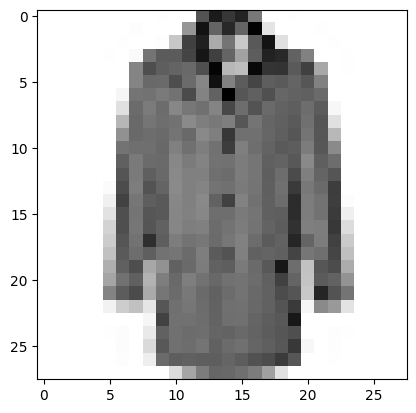

In [32]:
predict(model, test_dataset, device)